<a href="https://colab.research.google.com/github/guilhermeguy/data_analysis/blob/master/Linear_Regression-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Project

This project uses fictional data of a e-commerce company

## Imports


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Uploading the data

In [0]:
clients = pd.read_csv('Ecommerce_Costumers.csv')

In [3]:
clients.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
clients.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploring the data

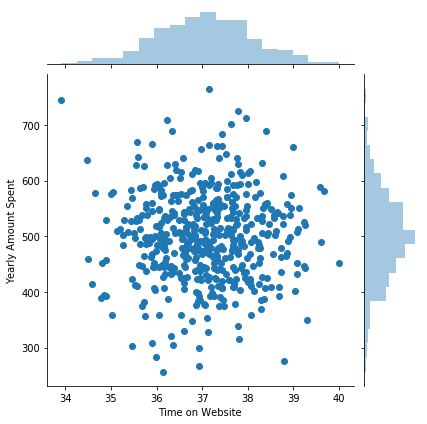

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clients)

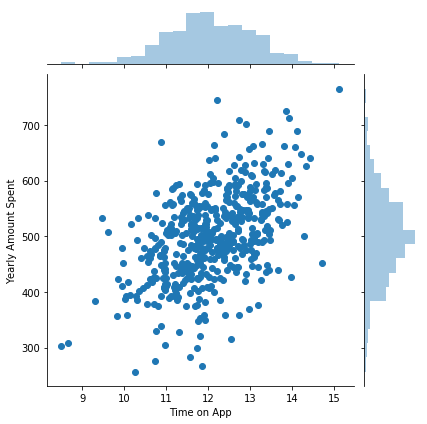

In [26]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clients)

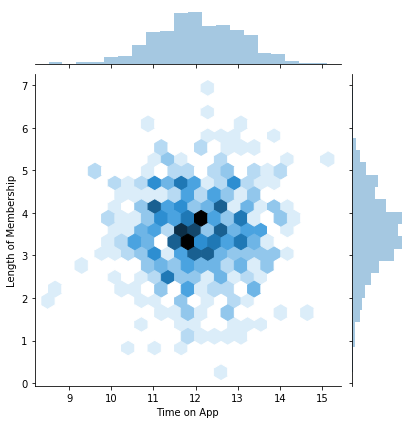

In [28]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clients, kind='hex')

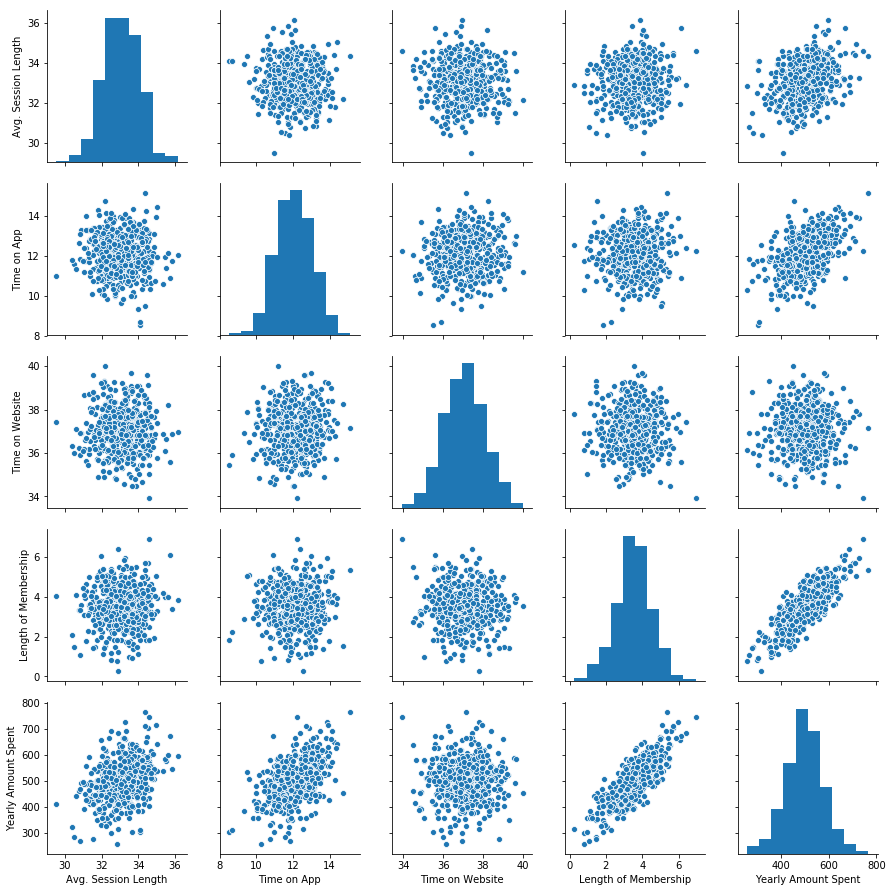

In [9]:
sns.pairplot(clients)

On the pairplot it seems there's a strong correlation between the Yearly Amount Spent and the Length of Membership

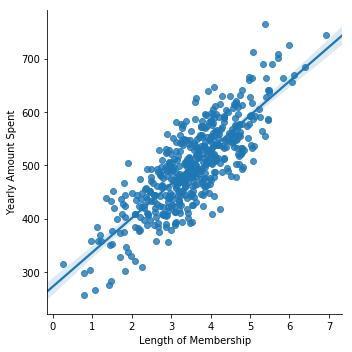

In [29]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent', clients)

## Training and test



In [30]:
clients.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [31]:
X = clients[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [0]:
Y = clients['Yearly Amount Spent']

In [0]:
from sklearn.model_selection import train_test_split

In [34]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state=101)
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382


## Model Training 

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [37]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Coefficients

In [38]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting the data

In [0]:
predict = lm.predict(X_test)

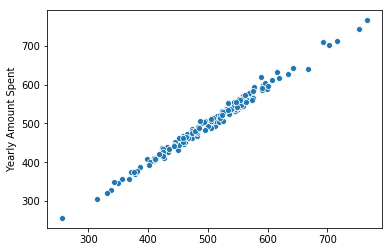

In [40]:
sns.scatterplot(predict, Y_test)

## Model evaluation

In [0]:
from sklearn import metrics

In [42]:
print(f'''MAE = {metrics.mean_absolute_error(Y_test, predict)}
MSE = {metrics.mean_squared_error(Y_test, predict)}
RMSE = {np.sqrt(metrics.mean_squared_error(Y_test, predict))}''')

MAE = 7.2281486534308295
MSE = 79.8130516509743
RMSE = 8.933815066978626


## Residuals



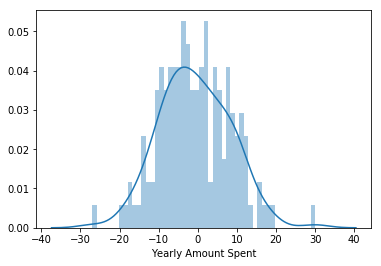

In [45]:
sns.distplot((Y_test - predict), bins=50)

In [44]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Conclusions

The coefficients represent the increase in Yearly Amount Spent for an unitary increase in the parameters.

The company should invest in client loyalty programs as the data showed the longer the client has been a Member, the more they tend to spend.

The data also shows the company should concentrate more on the app than in the website.